<h1 align="center"> YRoots Demo </h1>

YRoots is a numerical rootfinding package that quickly and precisely finds and returns all of the real roots of a system of equations in a compact interval in $\mathbb{R}^n$.

This demo notebook illustrates the power of YRoots in solving particularly challenging rootfinding problems. To get started, make sure you have installed YRoots (see the tutorial to learn how) and then run the following import statements:

In [1]:
import numpy as np
import yroots as yr
%matplotlib inline
from matplotlib import pyplot as plt


## Example 1:

Here is a system of equations on the search domain $[-1,1]\times[-1,1]$ discussed in [a published paper](https://link.springer.com/article/10.1007/s00211-014-0635-z).

$$f(x,y) =\sin(30x−y/30)+y$$
$$g(x,y) =\cos(x/30−30y)−x$$

Try running yr.solve on this system using the code below.

NOTE: Due to the use of just in time compiling, the very first time the solver is called after being imported, the compilation may take several seconds before the solver actually begins to run. To see the true speed of the solver, simply run the code again. This second iteration, and any other subsequent calls to the solver with systems of equations of the same dimension, will run at the true speed after this first compilation.

In [2]:
f = lambda x,y: np.sin(30*x-y/30)+y
g = lambda x,y: np.cos(x/30-30*y)-x

a = [-1,-1] # lower bounds of search domain
b = [1,1] # upper bounds of search domain

roots =  yr.solve([f,g], a, b, verbose=True)

print(' Maximal residual for f is {} \n Maximal residual for g is {}'. format(np.max(np.abs(f(roots[:,0],roots[:,1]))),np.max(np.abs(g(roots[:,0],roots[:,1])))))

Approximation shapes: 0: (64, 7) 1: (7, 63)
Searching on interval [[-1, 1], [-1, 1]]
Finding roots... ***************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************
Found 363 roots

 Maximal residual for f is 6.661338147750939e-15 
 Maximal residual for g is 1.354472090042691e-14


As you can observe, YRoots found all 363 real roots contained in this domain with near machine epsilon precision! Check out the plot of the zero loci (the level curves corresponding to f = 0 and g = 0) along with the roots found by running the code below:

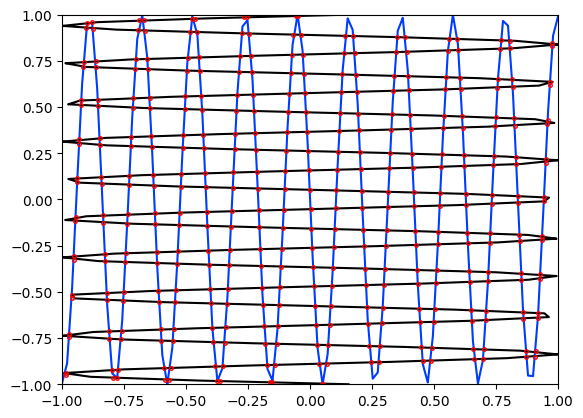

In [3]:
#plot f,g, and the roots
x = np.linspace(-1,1,100)
y = x.copy()
X,Y = np.meshgrid(x,y)
plt.contour(X,Y,f(X,Y),levels=[0],colors='#003cff')
plt.contour(X,Y,g(X,Y),levels=[0],colors='k')
plt.plot(roots[:,0],roots[:,1],'.',color='none',markeredgecolor='r',markersize=5)

### Example 2:

Here is a more complicated bivariate system on the region $[-5,5]\times[-5,5]$. It is more complicated because there are many points in the search interval that are "nearly" roots but are not roots.

$$f(x,y) = \sin(20x+y)$$
$$g(x,y) = \cos(x^2+xy)-\frac{1}{4}$$

The following code runs yr.solve on the system of equations and plots the zero loci. Notice that YRoots correctly avoids points that are nearly roots but are not roots.

Approximation shapes: 0: (147, 25) 1: (97, 57)
Searching on interval [[-5, 5], [-5, 5]]
Finding roots... ********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************
Found 452 roots

CPU times: total: 1.8 s
Wall time: 5.22 s
 Maximal residual for f is 4.655390982542389e-14 
 Maximal residual for g is 2.0317081350640365e-14


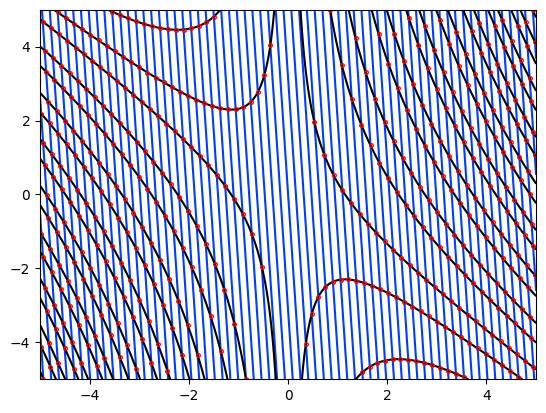

In [4]:
f = lambda x,y : np.sin(20*x+y)
g = lambda x,y : np.cos(x**2+x*y)-.25
a = [-5,-5]
b = [5,5]

%time roots = yr.solve([f,g], a, b, verbose=True)
print(' Maximal residual for f is {} \n Maximal residual for g is {}'.format(np.max(np.abs(f(roots[:,0],roots[:,1]))),np.max(np.abs(g(roots[:,0],roots[:,1])))))

x = np.linspace(-5,5,500)
y = x.copy()
X,Y = np.meshgrid(x,y)
plt.contour(X,Y,f(X,Y),levels=[0],colors='#003cff')
plt.contour(X,Y,g(X,Y),levels=[0],colors='k')
plt.plot(roots[:,0],roots[:,1],'.',color='none',markeredgecolor='r',markersize=5)

### Example 3:

YRoots can also be used for optimization problems, since the common roots of the partial derivatives of a function are critical points. The Rosenbrock function, $f(x,y) = (1-x)^2 + 100(y-x^2)^2$ is often used as a performace test for optimization algorithms. While the zero loci run very close to each other, there is an absolute minimum at (1,1). Test the capability of YRoots to solve optimization problems by calling the solver on the partial derivatives of this function:

[[1. 1.]]
 Maximal residual for fx is 6.414868636284307e-13 
 Maximal residual for fy is 2.220446049250313e-14


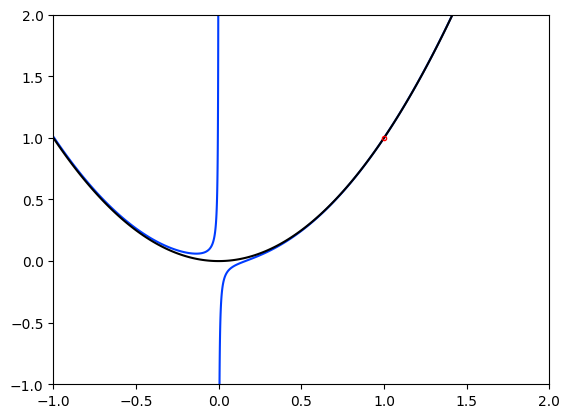

In [5]:
fx = lambda x,y: 2*(x-1) + 200*(y-x**2)*(-2*x)
fy = lambda x,y: 200*(y-x**2)
a = [-1,-1]
b = [2,2]
roots = yr.solve([fx,fy],a,b)
print(roots)
print(' Maximal residual for fx is {} \n Maximal residual for fy is {}'.format(np.max(np.abs(fx(roots[:,0],roots[:,1]))),np.max(np.abs(fy(roots[:,0],roots[:,1])))))

x = np.linspace(-1,2,300)
y = np.linspace(-1,2,300)
X,Y = np.meshgrid(x,y)
plt.contour(X,Y,fx(X,Y),levels=[0],colors='#003cff')
plt.contour(X,Y,fy(X,Y),levels=[0],colors='k')
plt.plot(roots[:,0],roots[:,1],'.',color='none',markeredgecolor='r',markersize=6)

## Example 4:

Nick Trefethen's Hundred-dollar, Hundred-digit Challenge problems include finding the minimum of the function 
$$f(x,y) = e^{\sin(50x)} + \sin(60e^y) + \sin(70 \sin (x))+\sin(\sin(80y)) - \sin(10(x+y)) + 1/4(x^2 + y^2)$$

To get an idea of the complexity of this function, run the following cell of code, which gives a 3D plot of the function on the interval $[-1,1]\times[-1,1]$:



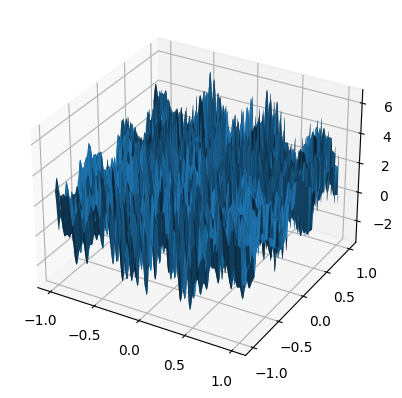

In [6]:
#3D plot of the function to optimize
f = lambda x,y : np.exp(np.sin(50*x)) + np.sin(60*np.exp(y)) + np.sin(70*np.sin(x)) + np.sin(np.sin(80*y)) \
                - np.sin(10*(x+y)) + .25 * (x**2 + y**2)
x = np.linspace(-1,1, 1000)
X, Y = np.meshgrid(x, x)

fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot_surface(X, Y, f(X,Y))

Now run the following code and watch YRoots accurately find and return all 2720 known roots of the partial derivatives of this function on the interval $[-1,1]\times[-1,1]$:

Approximation shapes: 0: (698, 35) 1: (34, 1059)
Searching on interval [[-1.0, 1.0], [-1.0, 1.0]]
Finding roots... *********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

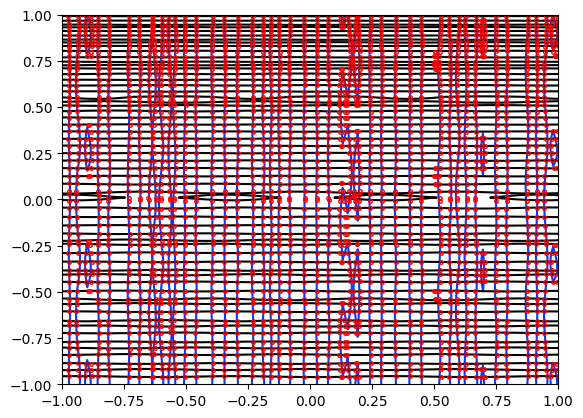

In [7]:
fx = lambda x,y : 50*np.cos(50*x)*np.exp(np.sin(50*x)) + 70*np.cos(x)*np.cos(70*np.sin(x)) - 10*np.cos(10*(x+y)) + .5 * x
fy = lambda x,y : 60*np.exp(y)*np.cos(60*np.exp(y)) + 80*np.cos(80*y)*np.cos(np.sin(80*y))- 10*np.cos(10*(x+y)) + .5 * y
a = -np.ones(2)
b = np.ones(2)
%time roots = yr.solve([fx,fy],a,b, verbose=True)
print(' Maximal residual for fx is {} \n Maximal residual for fy is {}'.format(np.max(np.abs(fx(roots[:,0],roots[:,1]))),np.max(np.abs(fy(roots[:,0],roots[:,1])))))

x = np.linspace(-1,1,100)
y = x.copy()
X,Y = np.meshgrid(x,y)
plt.contour(X,Y,fx(X,Y),levels=[0],colors='#003cff')
plt.contour(X,Y,fy(X,Y),levels=[0],colors='k')
plt.plot(roots[:,0],roots[:,1],'.',color='none',markeredgecolor='r',markersize=5)


## Example 5:

We round out this exposition of the precision and speed of YRoots in rootfinding with a 3D example. Consider the following system of equations in three variables:

$$ f(x,y,z) = \sin(5x+y+z)$$
$$ g(x,y,z) = \sin(xyz)$$
$$ h(x,y,z) = x^2 + y^2 - z^2 - 1$$

First, try using yr.solve to find the roots:

NOTE: Since this system of equations is of a new dimension, the compilation of the code needed to solve this problem will take several seconds before the solver actually starts running. Feel free to run it again to see how the time compares after the code is already compiled.

In [12]:
f = lambda x,y,z : np.sin(5*x+y+z)
g = lambda x,y,z : np.sin(x*y*z)
h = lambda x,y,z : x**2+y**2-z**2-1
a = -np.ones(3)
b = np.ones(3)

%time roots = yr.solve([f,g,h], a, b)
print(roots)
print("Maximum residuals: ", roots.shape[0],np.max(np.abs(f(*[roots[:,i] for i in range(3)]))),np.max(np.abs(g(*[roots[:,i] for i in range(3)]))),np.max(np.abs(h(*[roots[:,i] for i in range(3)]))))

CPU times: total: 62.5 ms
Wall time: 199 ms
[[-4.49680650e-01 -8.93189405e-01 -1.64656558e-16]
 [-7.58624217e-01  6.51528432e-01 -3.32484999e-16]
 [-1.96116135e-01  9.80580676e-01  6.55906999e-18]
 [ 1.96116135e-01 -9.80580676e-01 -8.59599160e-17]
 [ 7.58624217e-01 -6.51528432e-01 -7.77399492e-17]
 [ 4.49680650e-01  8.93189405e-01 -4.49543662e-16]]
Maximum residuals:  6 1.2098029496354525e-15 1.8055920825065565e-16 1.1102230246251565e-16


To visualize the results of this rootfinding problem, run the code below  which graphs these level surfaces and their common roots (code is from [here](https://stackoverflow.com/questions/4680525/plotting-implicit-equations-in-3d)).

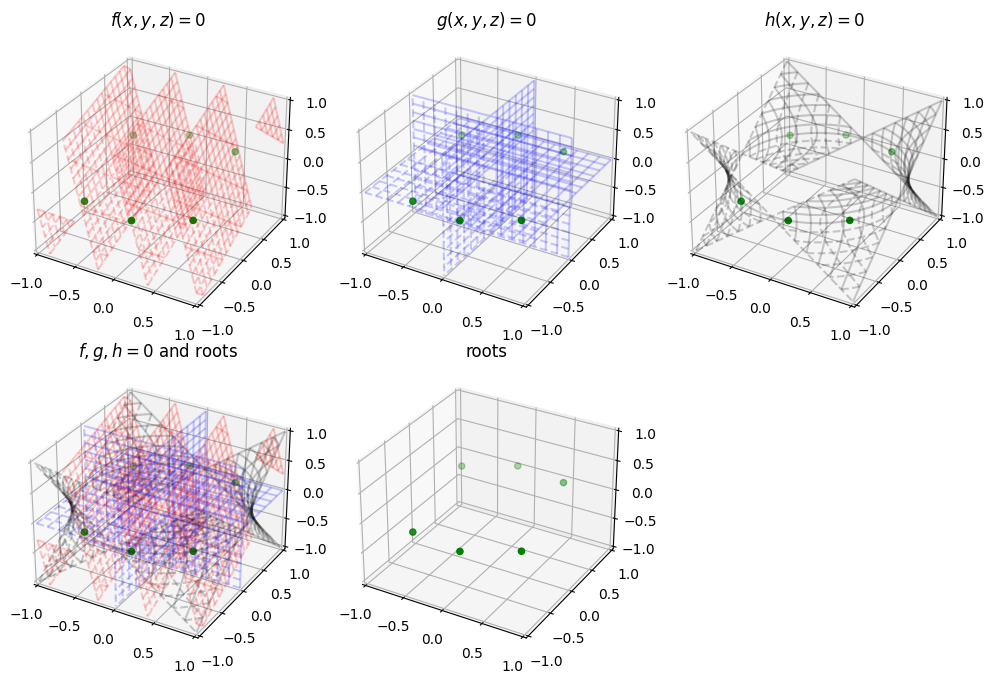

In [13]:
#function for plotting level surfaces in 3D
def plot_implicit(fn, color, bbox=(-1,1)):
    ''' create a plot of an implicit function
    fn  ...implicit function (plot where fn==0)
    bbox ..the x,y,and z limits of plotted interval'''
    xmin, xmax, ymin, ymax, zmin, zmax = bbox*3
    A = np.linspace(xmin, xmax, 100) # resolution of the contour
    B = np.linspace(xmin, xmax, 15) # number of slices
    A1,A2 = np.meshgrid(A,A) # grid on which the contour is plotted

    for z in B: # plot contours in the XY plane
        X,Y = A1,A2
        Z = fn(X,Y,z)
        cset = ax.contour(X, Y, Z+z, [z], colors=color,alpha=.2,zdir='z')
        # [z] defines the only level to plot for this contour for this value of z

    for y in B: # plot contours in the XZ plane
        X,Z = A1,A2
        Y = fn(X,y,Z)
        cset = ax.contour(X, Y+y, Z, [y], colors=color,alpha=.2,zdir='y')

    for x in B: # plot contours in the YZ plane
        Y,Z = A1,A2
        X = fn(x,Y,Z)
        cset = ax.contour(X+x, Y, Z, [x], colors=color,alpha=.2,zdir='x')

    #set plot limits
    ax.set_zlim3d(zmin,zmax)
    ax.set_xlim3d(xmin,xmax)
    ax.set_ylim3d(ymin,ymax)
    
#plot each level surface individually, then together

#f
fig = plt.figure(figsize=(10,20))
ax = fig.add_subplot(631, projection='3d')
ax.scatter(*[roots[:,i] for i in range(3)],color='g')
plot_implicit(f,'r')
ax.set_title('$f(x,y,z)=0$')

#g
ax = fig.add_subplot(632, projection='3d')
ax.scatter(*[roots[:,i] for i in range(3)],color='g')
plot_implicit(g,'b')
ax.set_title('$g(x,y,z)=0$')

#h
ax = fig.add_subplot(633, projection='3d')
ax.scatter(*[roots[:,i] for i in range(3)],color='g')
plot_implicit(h,'k')
ax.set_title('$h(x,y,z)=0$')

#together
ax = fig.add_subplot(634, projection='3d')
ax.scatter(*[roots[:,i] for i in range(3)],color='g')
plot_implicit(f,'r')
plot_implicit(g,'b')
plot_implicit(h,'k')
ax.set_title('$f,g,h = 0$ and roots')

#just the roots
ax = fig.add_subplot(635, projection='3d')
ax.scatter(*[roots[:,i] for i in range(3)],color='g')
ax.set_title('roots')
ax.set_zlim3d(-1,1)
ax.set_xlim3d(-1,1)
ax.set_ylim3d(-1,1)
plt.tight_layout()

## Solve Your Own System

While the examples in this tutorial are impressive, they hardly scratch the surface of what is possible.

For example, YRoots is capable of solving systems of equations in higher dimensions as well. In fact, it has accurately solved (over extended periods of time) even ten-dimensional systems of equations (low degree polynomials). And in lower dimensions, YRoots is capable of quickly and accurately solving even the most complicated smooth and continuous functions you can think of, provided the system does not have infinite roots.

Thus, while this tutorial as provided a shallow dive into the power and capabilities of YRoots, the only way to truly comprehend the full depth of its strengths and limitations in rootfinding is to try it out on systems of equations of your choosing. Space is provided below for you to build your own problem and get started.

In [10]:
# Build and solve your own system of equations here.

In [11]:
# Good luck and happy rootfinding!